In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU
from numpy import array
plt.rcParams['figure.figsize'] = [20, 8]

In [36]:
df = pd.read_csv('../Dataset/Platinum.csv')
df = df.sort_index(ascending=False)
df

,Date,Open,Close,High,Low
1694,3/1/2019,871.0,860.0,874.5,857.5
1693,3/3/2019,860.0,860.5,860.5,860.0
1692,3/4/2019,863.0,836.5,864.0,835.0
1691,3/5/2019,836.5,837.0,840.5,833.0
1690,3/6/2019,836.0,827.0,837.5,825.0
...,...,...,...,...,...
4,3/22/2024,909.0,897.5,913.0,896.0
3,3/23/2024,897.5,897.5,897.5,897.5
2,3/24/2024,0.0,898.0,899.0,0.0
1,3/25/2024,898.5,904.5,913.5,898.5


In [37]:
df['Close'].isnull().sum()

0

In [38]:
df = df.reset_index()['Close']

In [39]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df).reshape(-1,1))

In [40]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [41]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [42]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [43]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [44]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
model.fit(X_train, y_train, validation_data = (X_test, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
20/20 [==============================] - 6s 131ms/step - loss: 0.1119 - val_loss: 0.0297
Epoch 2/100
20/20 [==============================] - 2s 88ms/step - loss: 0.0105 - val_loss: 7.6662e-04
Epoch 3/100
20/20 [==============================] - 2s 86ms/step - loss: 0.0051 - val_loss: 0.0032
Epoch 4/100
20/20 [==============================] - 2s 100ms/step - loss: 0.0038 - val_loss: 0.0014
Epoch 5/100
20/20 [==============================] - 2s 92ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 6/100
20/20 [==============================] - 2s 97ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 7/100
20/20 [==============================] - 2s 88ms/step - loss: 0.0018 - val_loss: 8.0271e-04
Epoch 8/100
20/20 [==============================] - 2s 85ms/step - loss: 0.0015 - val_loss: 6.6448e-04
Epoch 9/100
20/20 [==============================] - 3s 134ms/step - loss: 0.0012 - val_loss: 6.0494e-04
Epoch 10/100
20/20 [==============================] - 2s 100ms/step - loss: 0.001

In [46]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)

8/8 [==============================] - 0s 23ms/step


In [47]:
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)

In [48]:
train_size1 = int(0.8 * len(df))
test_size1 = len(df) - train_size

train_data1 = df[:train_size]
test_data1 = df[train_size:]

x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1)

In [49]:
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test1)**2))
print('Testing RMSE:', test_rmse)

#MSE
test_mse = np.mean((y_pred - y_test1)**2)
print('Testing MSE:', test_mse)

#MAPE
test_mape = np.mean(np.abs((y_test1 - y_pred) / y_test1)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test1))
print('Testing MAE:', test_mae)

Testing RMSE: 72.68129909075357
Testing MSE: 5282.571237519576
Testing MAPE: 5.384812657215142
Testing MAE: 53.04769469892579


In [50]:
lst_output=[]
n_steps=100
i=0

x_input = test_data[len(test_data) - n_steps:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.43679467]
101
1 day input [0.4978903  0.4978903  0.4978903  0.50070323 0.51687764 0.5281294
 0.52461322 0.54008439 0.54008439 0.54008439 0.54008439 0.54078762
 0.56891702 0.58087201 0.56329114 0.5583685  0.5625879  0.55274262
 0.53938115 0.51054852 0.52180028 0.52180028 0.51969058 0.5
 0.47960619 0.46132208 0.44725738 0.44233474 0.44233474 0.44936709
 0.45147679 0.42827004 0.40787623 0.4395218  0.43248945 0.43248945
 0.43248945 0.42616034 0.42967651 0.44303797 0.41420534 0.4535865
 0.4535865  0.4535865  0.47327707 0.46483826 0.46624473 0.45218003
 0.42264416 0.42264416 0.42264416 0.42686357 0.43811533 0.40436006
 0.41420534 0.395218   0.395218   0.39170183 0.41842475 0.3931083
 0.41912799 0.42967651 0.4416315  0.4416315  0.4416315  0.43319269
 0.44374121 0.40857947 0.43108298 0.43319269 0.43319269 0.39662447
 0.41912799 0.40225035 0.40084388 0.41279887 0.40646976 0.42967651
 0.40576653 0.44514768 0.45780591 0.44585091 0.45007032 0.4838256
 0.46413502 0.48945148 0.46835443 0.48452883

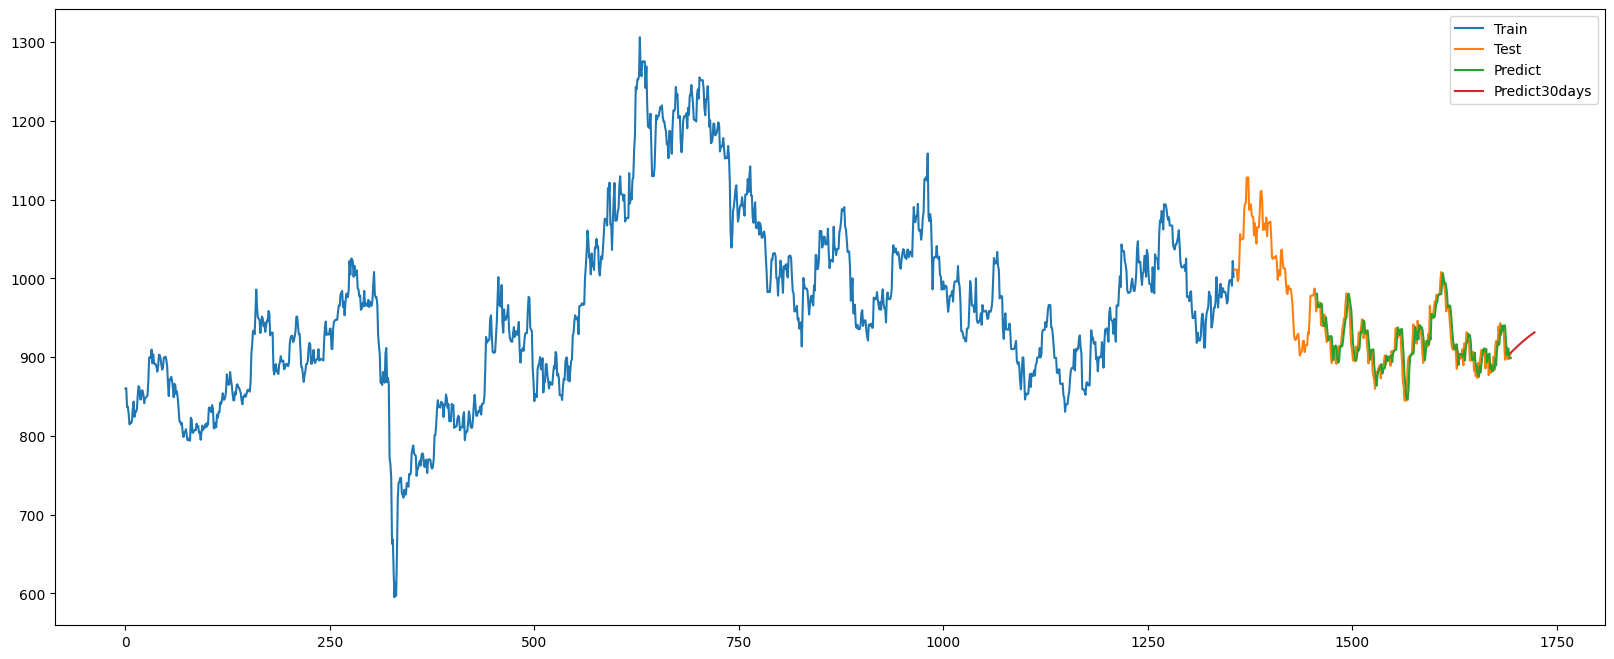

<Figure size 2000x800 with 0 Axes>

In [51]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Predict30days'])
plt.figure()
plt.show()